在 Windows10 系统测试代码：

In [1]:
from pathlib import Path
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_data_gen = image_generator.flow_from_directory(directory='data',
                                                    batch_size=BATCH_SIZE,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    shuffle=True)

Found 18680 images belonging to 2 classes.


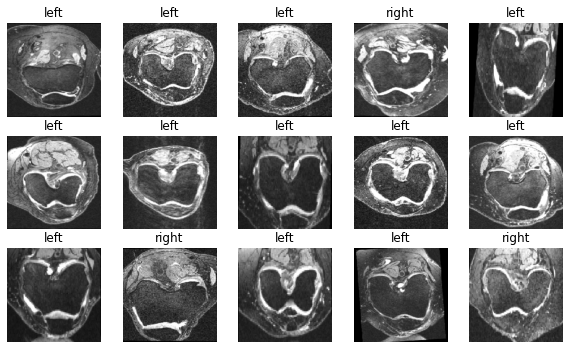

In [3]:
import matplotlib.pyplot as plt
CLASS_NAMES = {v:k for k, v in train_data_gen.class_indices.items()}
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(15):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n][0]])
        plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [4]:
ResNet50 = tf.keras.applications.resnet_v2.ResNet50V2(weights='imagenet', input_shape=(224,224,3))
for layer in ResNet50.layers:
    layer.trainable = False
net = tf.keras.models.Sequential()
net.add(ResNet50)
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(2, activation='softmax'))

In [5]:
net.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = net.fit(train_data_gen, steps_per_epoch=10, epochs=3)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 9s 891ms/step - loss: 0.6944 - accuracy: 0.4812
Epoch 2/3
10/10 [==============================] - 9s 877ms/step - loss: 0.6939 - accuracy: 0.4551
Epoch 3/3
10/10 [==============================] - 12s 1s/step - loss: 0.6901 - accuracy: 0.5719


In [6]:
ResNet50_scratch = tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(224, 224, 3))
net_scratch = tf.keras.models.Sequential()
net_scratch.add(ResNet50_scratch)
net_scratch.add(tf.keras.layers.Flatten())
net_scratch.add(tf.keras.layers.Dense(2, activation='softmax'))

net_scratch.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history = net_scratch.fit(train_data_gen, steps_per_epoch=10, epochs=3)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 106s 11s/step - loss: 0.6636 - accuracy: 0.8031
Epoch 2/3
10/10 [==============================] - 110s 11s/step - loss: 0.6327 - accuracy: 0.9156
Epoch 3/3
10/10 [==============================] - 111s 11s/step - loss: 0.6197 - accuracy: 0.9312
